In [12]:
import pandas as pd
import re

In [5]:
female_names = [
    'Abby', 'Adriana', 'Alberta', 'Alexia', 'Alice', 'Alicia', 'Alida', 'Alison', 'Allison', 'Amelia',
    'Ami', 'Amy', 'Ana', 'Angela', 'Ann', 'Anna', 'Ari', 'Ariana', 'Arya', 'Aubrey', 'Audrey', 'Bailey',
    'Beth', 'Bethany', 'Betsy', 'Billie', 'Brenda', 'Bri', 'Casey', 'Cassie', 'Catherine', 'Cathy',
    'Celia', 'Charli', 'Charlotte', 'Cherise', 'Christi', 'Christine', 'Cindi', 'Claire', 'Clara',
    'Claudia', 'Cora', 'Danika', 'Danielle', 'Daphne', 'Darlene', 'Diane', 'Dina', 'Donna', 'Doris',
    'Dorothy', 'Dotty', 'Elena', 'Elizabeth', 'Ellen', 'Emily', 'Emma', 'Eve', 'Evelyn', 'Felicia',
    'Fran', 'Francie', 'Francine', 'Geena', 'Ginger', 'Glenda', 'Haley', 'Halley', 'Hannah', 'Hazel',
    'Heather', 'Helen', 'Helena', 'Hilda', 'India', 'Irma', 'Isabel', 'Jacquie', 'Jamy', 'Janel',
    'Janice', 'Janine', 'Jasmine', 'Jen', 'Jenna', 'Jennifer', 'Jennifers', 'Jess', 'Jessie', 'Jessy',
    'Jill', 'Joanna', 'Joanne', 'Jodi', 'Juicy', 'Julie', 'Juliette', 'Kara', 'Kat', 'Katelyn', 'Kathy',
    'Katia', 'Katie', 'Katrina', 'Katy', 'Kayla', 'Kelly', 'Kelsey', 'Kenya', 'Kerri', 'Kira', 'Kristen',
    'Kristin', 'Lana', 'Lara', 'Lauren', 'Leslie', 'Linda', 'Lisa', 'Lorelei', 'Lorena', 'Louise', 'Lucy',
    'Mabel', 'Maddie', 'Mae', 'Maggie', 'Mallory', 'Marcy', 'Maria', 'Mariah', 'Marianne', 'Marilyn',
    'Marissa', 'Marla', 'Martha', 'Mary', 'Maryann', 'Melinda', 'Mina', 'Mindy', 'Misty', 'Monica',
    'Mya', 'Nancy', 'Natalie', 'Natasha', 'Nina', 'Olga', 'Olivia', 'Paisley', 'Pam', 'Pamela', 'Pat',
    'Patricia', 'Patti', 'Paula', 'Peggy', 'Priscilla', 'Rachel', 'Ramona', 'Rebecca', 'Rhiannon',
    'Rhonda', 'Rosalind', 'Rose', 'Ruby', 'Sadie', 'Sally', 'Samantha', 'Sandy', 'Sara', 'Sarah',
    'Scarlett', 'Selma', 'Shannon', 'Sharon', 'Shelley', 'Shirley', 'Sissy', 'Sue', 'Susan', 'Susie',
    'Suzie', 'Tabatha', 'Tanya', 'Tara', 'Tasha', 'Tatianna', 'Taylor', 'Teresa', 'Terri', 'Tia',
    'Tina', 'Tracy', 'Venus', 'Victoria', 'Wanda', 'Wendy', 'Zelda', 'Zora'
]


male_names = [
    'Aaron', 'Aarons', 'Achilles', 'Adam', 'Adams', 'Aiden', 'Alfred', 'Ali', 'Allen', 'Andrew', 'Andy', 'Angel', 'Anthony',
    'Ari', 'Arnold', 'Arthur', 'Barry', 'Ben', 'Benjamin', 'Bennett', 'Bertram', 'Beto', 'Bill', 'Billy', 'Bob', 'Bobby',
    'Braden', 'Bradley', 'Bret', 'Brett', 'Brian', 'Bruce', 'Bryan', 'Bryce', 'Byron', 'Cal', 'Cameron', 'Carl', 'Carter',
    'Casper', 'Cate', 'Chad', 'Charles', 'Charlie', 'Chip', 'Chris', 'Christopher', 'Chuck', 'Clint', 'Colby', 'Connor',
    'Damien', 'Dan', 'Daniel', 'Danny', 'Darren', 'David', 'Dean', 'Derrick', 'Don', 'Donald', 'Doug', 'Dwight', 'Earl', 'Ed',
    'Eddy', 'Eli', 'Elmer', 'Evan', 'Frank', 'Franklin', 'Fred', 'Gabe', 'Gary', 'Gavin', 'George', 'Gordon', 'Greg', 'Hamza',
    'Hank', 'Harry', 'Henry', 'Hunter', 'Igor', 'Jack', 'Jackson', 'Jacob', 'Jake', 'Jame', 'James', 'Jameson', 'Jamie', 'Jamy',
    'Jan', 'Jay', 'Jeb', 'Jeff', 'Jefferson', 'Jeffrey', 'Jeramy', 'Jeremy', 'Jerry', 'Jesus', 'Joe', 'Joel', 'Joey', 'John',
    'Johnathan', 'Jon', 'Jonathan', 'Josh', 'Joshua', 'Justin', 'Ken', 'Kendall', 'Kenneth', 'Kenny', 'Kevin', 'Kyle', 'Leo',
    'Leonard', 'Leroy', 'Leslie', 'Liam', 'Logan', 'Lonnie', 'Lucas', 'Luke', 'Mack', 'Major', 'Manfred', 'Marco', 'Marcus',
    'Mark', 'Matt', 'Matthew', 'Max', 'Michael', 'Michaels', 'Miguel', 'Mitch', 'Mohammad', 'Morgan', 'Nathan', 'Ned', 'Neil',
    'Nick', 'Nixon', 'Noah', 'Norman', 'Ollie', 'Owen', 'Patrick', 'Paul', 'Paulie', 'Perry', 'Pete', 'Peter', 'Phil', 'Philip',
    'Phillipe', 'Preston', 'Quentin', 'Quinn', 'Ralph', 'Randy', 'Ray', 'Rich', 'Richard', 'Rick', 'Rickley', 'Ricky', 'Riley',
    'Rob', 'Robert', 'Roger', 'Rogers', 'Ron', 'Royce', 'Russ', 'Ryan', 'Sam', 'Samuel', 'Scott', 'Seth', 'Shane', 'Stan',
    'Stephen', 'Steve', 'Steven', 'Ted', 'Terry', 'Thomas', 'Timothy', 'Toby', 'Tom', 'Tommy', 'Tony', 'Tyler', 'Walt',
    'Walter', 'William', 'Yuri'
]
prenoms_masculins = [
    'Ian', 'Dennis', 'Kyle', 'Logan', 'Craig', 'Derrick', 'Robert', 'Donald', 'William', 'Neil',
    'Kenneth', 'Eric', 'Kevin', 'Jason', 'Benjamin', 'Joseph', 'John', 'Aaron', 'Nick', 'Adam', 'Matthew',
    'Justin', 'Michael', 'Joel', 'Christopher', 'Steven', 'Brett', 'Jeffrey', 'Jim', 'Byron', 'Brian', 'Samuel',
    'Cricket', 'Jack', 'Lawrence', 'Randy', 'Ryan', 'Avid', 'Bill', 'Bob', 'Hunter', 'Jordan', 'Jay', 'Jeremy',
    'George', 'Ricky', 'Jake', 'David', 'Patrick', 'Joe', 'Don', 'Ken', 'Kenny', 'Mike',
    'Shane', 'Josh', 'Tim', 'Earl', 'Kim', 'Casper', 'Josh', 'Tim', 'Jay', 'Jeremy', 'Gavin',
    'Jay', 'Jeremy', 'David', 'Peter', 'Kendall', 'Jacob', 'Josh', 'Tim', 'Gordon', 'Daniel', 'Max',
    'Matt', 'Tim', 'Ken', 'Kevin', 'Joseph', 'Paul', 'George', 'Jeremy', 'Joseph', 'Brian', 'Nick', 'Nick', 'Ken',
    'Jake', 'Steve', 'Tom', 'Frank', 'Mike', 'Peter', 'Henry', 'Larry', 'John', 'James', 'Kyle', 'Tim', 'Michael',
    'Dave', 'Matt', 'Ben', 'Dustin', 'Oliver', 'Matt', 'Andy', 'Pete', 'Jake', 'Aaron', 'Brennan', 'Jason', 'James',
    'Thomas', 'Charles', 'Richard', 'Walter', 'Barry', 'Tom', 'Greg', 'Jerry', 'Mark', 'Johnny', 'Todd', 'Bobby',
    'Joe', 'Daniel', 'Sam', 'Chris', 'Josh', 'Will', 'Timothy', 'Samuel', 'Jack', 'Dustin', 'Johnny', 'Peter', 'Jerry',
    'Nelson'
]

prenoms_feminins = [
    'Patricia', 'Megan', 'Jessica', 'Elena', 'Tanya', 'Amy', 'Jennifer', 'Sue', 'Natalie', 'Betty', 'Kayla', 'Emily',
    'Felicia', 'Sarah', 'Jane', 'Christine', 'Victoria', 'Samantha', 'Katrina', 'Mary', 'Laura',
    'Rachel', 'Monica', 'Maria', 'Joan', 'Carrie', 'Angela', 'Cynthia', 'Tea', 'Avid', 'Rebecca', 'Jill', 'Michelle',
    'Jen', 'Brenda', 'Nancy', 'Tina', 'Pam', 'Margot', 'Donna', 'Glenda', 'Sheila', 'Callie',
    'Dina', 'Heather', 'Cathy', 'Susan', 'Fred', 'Jenny', 'Kenny', 'Jenny', 'Lauren',
    'Erin', 'Sandy', 'Erica', 'Sandy', 'Valentine', 'Sherry', 'Beth', 'Carla', 'Daphne', 'Rebecca', 'Tina',
    'Helen', 'Margaret', 'Emily', 'Rachel', 'Laura', 'Joanna', 'Jill', 'Lucy', 'Nina', 'Kimberly', 'Kate', 'Sally',
    'Zoe', 'Maggie', 'Olivia', 'Stephanie', 'Selma', 'Ruby', 'Ginger', 'Rita', 'Penny', 'Olga', 'Katie', 'Maggie',
    'Claire', 'Paula', 'Fiona', 'Marie', 'Monica', 'Hannah', 'Gabrielle', 'Jessica', 'Rita', 'Gina', 'Helen', 'Anna',
    'Elizabeth', 'Sophia', 'Isabel', 'Charlotte', 'Olivia', 'Emily', 'Pippa', 'Jessica', 'Naomi', 'Kristen', 'Melanie',
    'Amanda', 'Ruth', 'Leah', 'Tiffany', 'Mia', 'Eva', 'Dina', 'Christina', 'Mira', 'Maggie', 'Rachel', 'Lauren',
    'Lena', 'Sarah', 'Tasha', 'Amelia', 'Sophia', 'Rachel', 'Katie', 'Hannah', 'Juliette', 'Sandra', 'Melanie',
    'Rosie', 'Helen', 'Emma', 'Julia', 'Emma', 'Anna', 'Barbara', 'Mandy', 'Claudia', 'Jasmine', 'Sasha', 'Julia',
    'Zoe', 'Faith', 'Adriana', 'Sophie', 'Alice', 'Vera', 'Emily', 'Betty', 'Nicole', 'Ava', 'Diana', 'Maria', 'Charlotte',
    'Lindsey'
]

male_names += prenoms_masculins
female_names += prenoms_feminins

In [18]:

df_comp = pd.read_csv(r"C:\Users\User\Documents\GitHub\Wino-UROP\Dimitri\Classifieur\df_pred_comp.csv")
df_relationship = pd.read_csv(r"C:\Users\User\Documents\GitHub\Wino-UROP\Dimitri\Classifieur\df_pred_relationship.csv")
df_failure = pd.read_csv(r"C:\Users\User\Documents\GitHub\Wino-UROP\Dimitri\Classifieur\df_pred_failure.csv")
df_perfomance = pd.read_csv(r"C:\Users\User\Documents\GitHub\Wino-UROP\Dimitri\Classifieur\df_pred_performance.csv")
df_hesitation = pd.read_csv(r"C:\Users\User\Documents\GitHub\Wino-UROP\Dimitri\Classifieur\df_pred_hesitation.csv")

In [28]:
df_comp

,Unnamed: 0,qID,sentence,option1,option2,answer,probabilite_nourriture,classe
0,0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2,0.055292,autre
1,1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1,0.041379,autre
2,2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1,0.999997,comparison
3,3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2,0.999993,comparison
4,4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2,0.040143,autre
...,...,...,...,...,...,...,...,...
40393,40393,3PKJ68EHDNUOUBAJ3ASD64MQ8GSJHJ-1,I felt lucky because when the fish slipped of ...,pole,net,1,0.574537,incertitude
40394,40394,3W1K7D6QSDVJX2B852X30LVRM6WZBL-1,Dennis took months to write back to Kenneth's ...,Dennis,Kenneth,1,0.945279,comparison
40395,40395,3W1K7D6QSDVJX2B852X30LVRM6WZBL-2,Dennis took months to write back to Kenneth's ...,Dennis,Kenneth,2,0.966800,comparison
40396,40396,3BO3NEOQM2VSJ2H6ZK9L5F8V75BAIT-1,My hair looked better in a braid than a ponyta...,braid,ponytail,1,0.037413,autre


In [32]:

positive_labels = []

positive_labels.append(df_comp[df_comp['classe'] == 'comparison']['sentence'].tolist())
positive_labels.append(df_relationship[df_relationship['classe'] == 'relationship']['sentence'].tolist())
positive_labels.append(df_failure[df_failure['classe'] == 'failure']['sentence'].tolist())  
positive_labels.append(df_perfomance[df_perfomance['classe'] == 'performance']['sentence'].tolist())
positive_labels.append(df_hesitation[df_hesitation['classe'] == 'hesitation']['sentence'].tolist())



In [33]:
positive_labels

[['He never comes to my home, but I always go to his house because the _ is smaller.',
  'He never comes to my home, but I always go to his house because the _ is bigger.',
  'To overcome behavioural bias, we need to focus more on changing the conscious actions instead of the unconscious actions because the _ actions are voluntary.',
  'To overcome behavioural bias, we need to focus more on changing the conscious actions instead of the unconscious actions because the _ actions are involuntary.',
  'Megan has a lot less money than Jessica because _ just bought the winning lottery ticket.',
  'Megan has a lot more money than Jessica because _ just bought the winning lottery ticket.',
  'Craig really loves to clean all the time but Derrick does not because _ is very neat.',
  'Craig really loves to clean all the time but Derrick does not because _ is very untidy.',
  'The party was more interesting and uplifing than the funeral because the _ was rigid.',
  'The party was more interesting 

In [54]:
def genre_percentage(tab_sent, schema):
    counter_female, counter_male = 0, 0

    for sentence in tab_sent:
        if any(word in female_names for word in re.split(r"['\s]+", sentence)):
            counter_female += 1
        if any(word in male_names for word in re.split(r"['\s]+", sentence)):
            counter_male += 1
    per_female = counter_female / len(tab_sent) * 100
    per_male = counter_male / len(tab_sent) * 100
    per_autre = 100 - (per_male + per_female)
    return per_female, per_male, per_autre

schemas = ['comparison', 'relationship', 'failure', 'performance', 'hesitation']
schemas_2 = ['comparaison'] * 3 + ['relationship'] * 3 + ['failure'] * 3 + ['performance'] * 3 + ['hesitation'] * 3
data = {
    'Genre': ['femmes', 'hommes', 'autres'] * 5,
    'Pourcentage des phrases' : [],
    'Schéma': schemas_2
}

for i in range(len(schemas)):
    data['Pourcentage des phrases'].extend(genre_percentage(positive_labels[i], schemas[i]))  # Assuming the class names are in the same order as the dataframes

In [55]:
print(len(data['Pourcentage des phrases']))

15


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un exemple de DataFrame

df = pd.DataFrame(data)

print("Aperçu de notre DataFrame :")
print(df.head())
print("-" * 30)

Aperçu de notre DataFrame :
    Genre  Pourcentage des phrases        Schéma
0  femmes                35.414465   comparaison
1  hommes                62.788766   comparaison
2  autres                 1.796769   comparaison
3  femmes                68.579731  relationship
4  hommes                28.823102  relationship
------------------------------


[] []


<Figure size 1200x600 with 0 Axes>

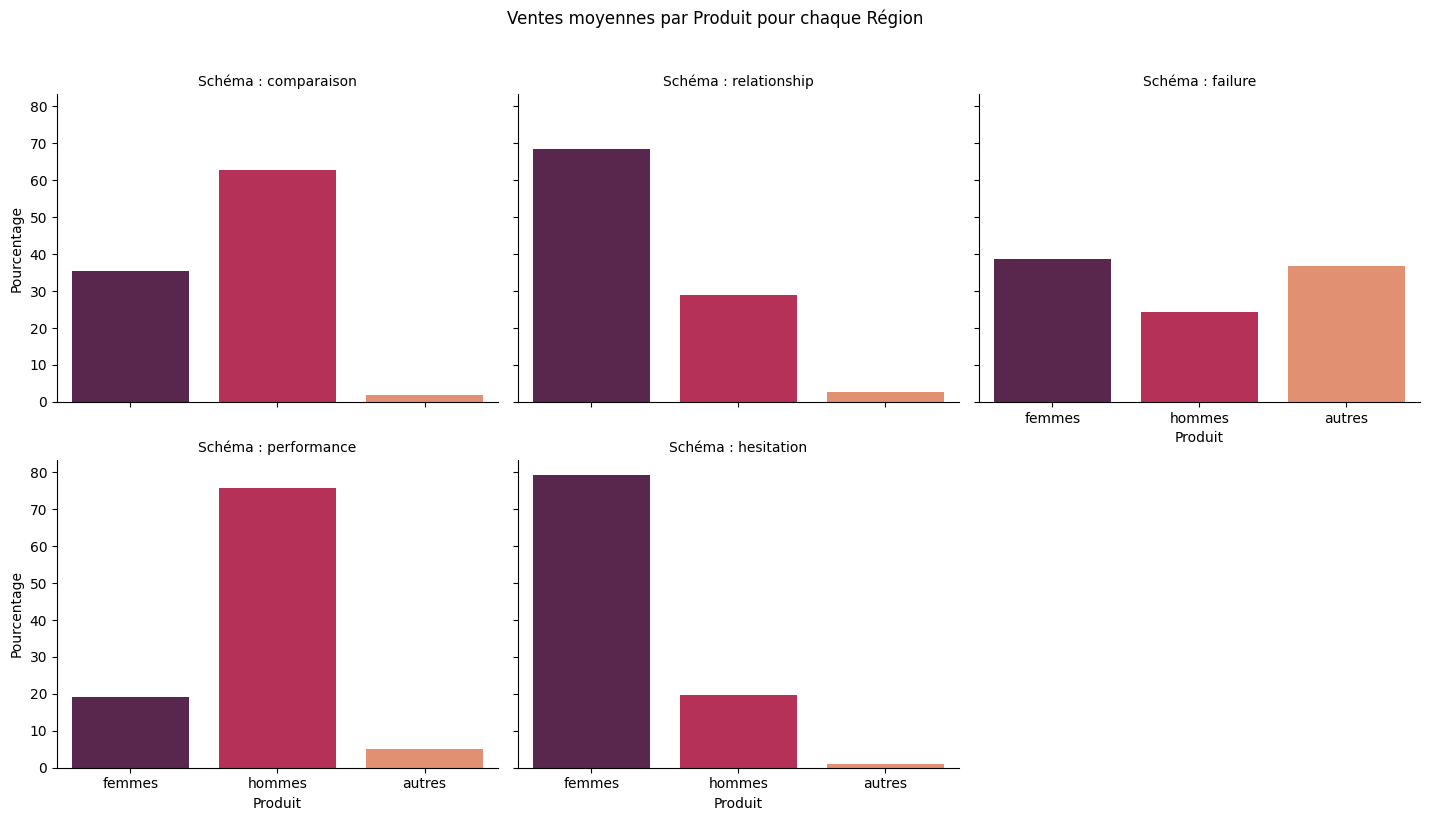

In [96]:
# Avec catplot, c'est encore plus simple pour créer des sous-graphiques par catégorie
# La colonne 'col' spécifie la variable par laquelle diviser les graphiques
# 'kind' spécifie le type de graphique (ici 'bar' pour bâtons)

plt.figure(figsize=(12, 6)) # figsize ici n'est qu'indicatif, catplot gère bien les dimensions internes

g = sns.catplot(
    data=df,
    x='Genre',
    y='Pourcentage des phrases',
    col='Schéma', # Crée une colonne de graphiques pour chaque région
    kind='bar',
    col_wrap=3,   # Afficher 2 graphiques par ligne
    height=4,     # Hauteur de chaque sous-graphique
    aspect=1.2,   # Ratio d'aspect de chaque sous-graphique
    hue='Genre',       # <-- Assignez la variable 'x' à 'hue'
    palette='rocket', # Palette de couleurs pastel
    errorbar=None # Pour ne pas afficher les barres d'erreur si la moyenne est déjà agrégée
,legend=False,           # Assurez-vous que la légende est générée
    legend_out=False       # <-- TRÈS IMPORTANT : Dit à Seaborn de NE PAS placer la légende en dehors par défaut
)

handles, labels = g.axes.flat[0].get_legend_handles_labels()

# g.fig.legend(
#     handles=handles,
#     labels=labels,
#     title='Légende', # Titre de la légende
#     bbox_to_anchor=(1, 0), # Coin inférieur droit de la figure
#     loc='lower right',     # Ancre le coin inférieur droit de la légende à (1, 0)
#     borderaxespad=0.1,
#     frameon=True,
#     fancybox=True,
#     shadow=True
# )

print(handles, labels)
# Ajuster les titres et labels
g.set_axis_labels("Produit", "Pourcentage") # Notez que catplot par défaut agrège en moyenne
g.set_titles("Schéma : {col_name}")
g.fig.suptitle('Ventes moyennes par Produit pour chaque Région', y=1.02) # Titre global de la figure

plt.tight_layout()
plt.show()